In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

Your Name and PRN:
- Name: Pankaj Gaikwad
- PRN : 250840128022
- Date : 12-11-2025

# Neural Network
## Assignment A01

## Implement of MP Neuron
### DataSet - Breast Cancer.

## 1. Import Statements

In [12]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

## 2. Setup Global Parameters

In [2]:
###----------------
### Some parameters
###----------------

# Directory locations
inpDir = '../../input' # Set path of input directory as per your system
outDir = '../output' # Set path of input directory as per your system

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 200  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [5]:
df=pd.read_csv(r"D:\DLDS\breast_cancer_mod.csv")

<BarContainer object of 2 artists>

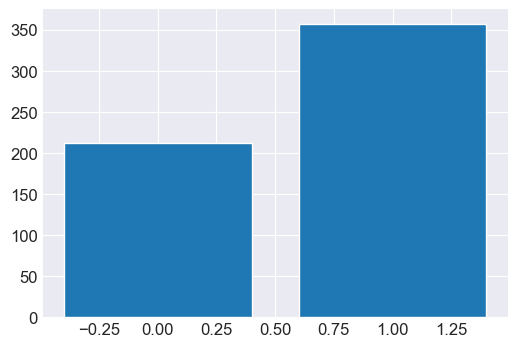

In [6]:
labels=["Malignant","Benign"]
fig,ax=plt.subplots(figsize=(6,4))
ax.bar(df["target"].value_counts().index,df["target"].value_counts().values)

In [7]:
for col in df.columns:
    print(f"col:{col}--{df[col].unique()}")

col:mean radius--[0 1]
col:mean texture--[0 1]
col:mean perimeter--[0 1]
col:mean area--[0 1]
col:mean smoothness--[0 1]
col:mean compactness--[0 1]
col:mean concavity--[0 1]
col:mean concave points--[0 1]
col:mean symmetry--[0 1]
col:mean fractal dimension--[1 0]
col:radius error--[0 1]
col:texture error--[1 0]
col:perimeter error--[0 1]
col:area error--[0 1]
col:smoothness error--[1 0]
col:compactness error--[1 0]
col:concavity error--[1 0]
col:concave points error--[1 0]
col:symmetry error--[1 0]
col:fractal dimension error--[1 0]
col:worst radius--[0 1]
col:worst texture--[0 1]
col:worst perimeter--[0 1]
col:worst area--[0 1]
col:worst smoothness--[1 0]
col:worst compactness--[1 0]
col:worst concavity--[0 1]
col:worst concave points--[0 1]
col:worst symmetry--[1 0]
col:worst fractal dimension--[1 0]
col:target--[0 1]


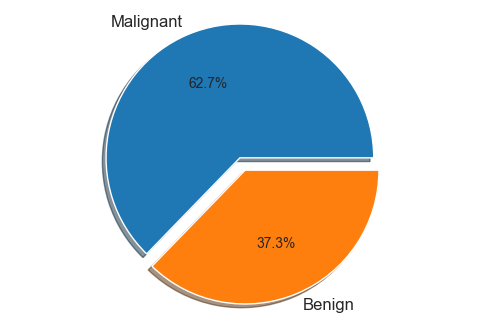

In [8]:
labels=["Malignant","Benign"]
fig,ax=plt.subplots(figsize=(6,4))
explode=(0,0.1)
ax.pie(df["target"].value_counts(),
       explode=explode,
       labels=labels,
       autopct="%1.1f%%",shadow=True,startangle=0)
ax.axis("equal");

In [9]:
features=df.drop("target",axis=1)
labels=df["target"]
features.shape,labels.shape

((569, 30), (569,))

In [13]:
X_train,X_test,y_train,y_test=train_test_split(features,labels,stratify=labels,test_size=0.3,random_state=24)

In [14]:
X_train["total"]=X_train.astype(np.int16).sum(axis=1)
X_train["target"]=y_train
X_train.sort_values("total",inplace=True)
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
2,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
5,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,1,1,15,0
6,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,1,15,0


In [15]:
X_test["total"]=X_test.astype(np.int16).sum(axis=1)
X_test["target"]=y_test
X_test.sort_values("total",inplace=True)
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,14,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,14,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0
8,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,15,0
12,0,0,0,1,1,0,1,1,0,1,...,0,1,1,0,0,0,0,1,16,0


In [16]:
accuracy={}
for b in range(X_train.shape[1]):
        X_train["pred"]=X_train["total"]>=b
        accuracy[b]=accuracy_score(X_train["target"],X_train["pred"])


In [17]:
best_b=max(accuracy,key=accuracy.get)
best_b

28

In [18]:
accuracy[best_b]

0.8417085427135679

In [19]:
X_train["pred"]=X_train["total"]>=best_b
accuracy_score(X_train["target"],X_train["pred"])

0.8417085427135679